# Contexte

<span style="font-size:18px;">Trois étapes seront suivies pour effectuer le feature engineering dans ce Notebook :

<span style="font-size:15px;">1- La construction de nouvelles features en tenant compte des features déjà en place.
    
<span style="font-size:15px;">2- Encodage de certaines colonnes.
    
<span style="font-size:15px;">3- Les ensembles de données finaux sont exportés pour la modélisation.

<span style="font-size:16px;">Nous aurons un ensemble de données qui comprend toutes nos colonnes d'origine, les colonnes nouvellement construite et les colonnes encodées à la fin de ce Notebook, que nous exporterons pour la partie modélisation.


In [1]:
package_list = {"pandas", "numpy", "matplotlib", "sklearn-learn"}

In [2]:
txt = !python  -m pip freeze
check = lambda i: any([(pack in i) for pack in package_list])
txt = [i for i in txt if check(i)]
txt

['matplotlib @ file:///C:/ci/matplotlib-suite_1660169687702/work',
 'matplotlib-inline==0.1.6',
 'numpy @ file:///C:/ci/numpy_and_numpy_base_1653574844560/work',
 'numpydoc @ file:///C:/Windows/TEMP/abs_30799058-86dd-4401-b621-d172137a4d87_ra3twm7/croots/recipe/numpydoc_1657529873713/work',
 'pandas @ file:///C:/b/abs_cdcgk91igc/croots/recipe/pandas_1663772960432/work']

In [3]:
# builtin
import os

#data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# configuration
from sklearn import set_config
set_config(display="diagram")
sns.set(style='whitegrid', palette='muted', color_codes=True)
pd.set_option('display.max_columns', 200)


# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

# compose
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

# pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# other optimisation
import scipy as sp
from xgboost import XGBClassifier

print('OK!! ')

OK!! 


In [4]:
os.listdir()

['.ipynb_checkpoints',
 '00_Cleaning.ipynb',
 '01_EDA.ipynb',
 '02_features_engineering.ipynb',
 '03_modelisation.ipynb',
 '04_modelisation_EmessionCo2.ipynb',
 'cache',
 'data',
 'figures',
 'resources',
 'shap_values',
 'Untitled.ipynb',
 '_FUNCTIONS_.ipynb',
 '_VERSIONS_.ipynb']

In [5]:
os.listdir("data")

['.ipynb_checkpoints', 'cleaned', 'source', 'transformed']

In [6]:
os.listdir("data/cleaned")

['df_cleaned.csv']

In [7]:
path = "./data/cleaned/"
filename = "df_cleaned.csv"

In [8]:
df = pd.read_csv(path+filename)

In [9]:
df.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kBtu,NaturalGas_kBtu,TotalGHGEmissions,GHGEmissionsIntensity
0,2016,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,Aucun,0.0,Aucun,0.0,60.0,81.714748,84.300003,182.500000,189.000000,7226362.00,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83
1,2016,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,80.991184,97.900002,176.100006,179.399994,8387933.00,8664479.0,0.00,3242851.0,5145082.0,295.86,2.86
2,2016,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,Aucun,0.0,Aucun,0.0,56.0,110.805337,113.300003,216.199997,224.000000,6794583.25,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67
3,2016,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Aucun,0.0,75.0,80.718789,118.699997,211.399994,215.600006,14172605.00,14656503.0,0.00,5368607.0,8803998.0,505.01,2.88
4,2016,Nonresidential COS,Other,7,DOWNTOWN,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,Aucun,0.0,Aucun,0.0,NaN,124.235425,141.600006,316.299988,320.500000,12086616.00,12581712.0,0.00,7371434.0,4715182.0,301.81,3.10


In [10]:
df.sample(5)

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kBtu,NaturalGas_kBtu,TotalGHGEmissions,GHGEmissionsIntensity
1168,2016,NonResidential,Warehouse,2,GREATER DUWAMISH,1962,1.0,1,31569,0,31569,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,31569.0,Aucun,0.0,Aucun,0.0,12.0,97.058475,101.400002,148.500000,157.399994,3064039.0,3344952.000,0.0,804992.0,2259047.0,125.59,3.98
707,2016,NonResidential,Self-Storage Facility,7,DOWNTOWN,1928,1.0,6,46580,0,46580,Self-Storage Facility,Self-Storage Facility,46580.0,Aucun,0.0,Aucun,0.0,NaN,15.248497,16.700001,47.900002,52.500000,710275.0,778702.125,0.0,710275.0,0.0,4.95,0.11
230,2016,NonResidential,Small- and Mid-Sized Office,7,DOWNTOWN,1925,1.0,4,52800,0,52800,"Office, Restaurant",Office,52800.0,Aucun,0.0,Aucun,0.0,83.0,46.004167,48.200001,123.099998,123.699997,2429020.0,2500323.750,0.0,1831932.0,597088.0,44.48,0.84
1075,2016,NonResidential,Small- and Mid-Sized Office,2,GREATER DUWAMISH,1913,1.0,4,53840,12870,40970,"Office, Parking",Office,42800.0,Parking,10400.0,Aucun,0.0,71.0,54.094614,70.900002,185.600006,188.600006,2912454.0,3034711.500,0.0,2337197.0,575257.0,46.85,0.87
1386,2016,NonResidential,Mixed Use Property,2,GREATER DUWAMISH,2004,1.0,3,21947,0,21947,"Office, Other, Parking",Other,21947.0,Aucun,0.0,Aucun,0.0,NaN,70.834237,61.599998,136.000000,139.300003,1554599.0,1658135.375,0.0,969591.0,585008.0,37.83,1.72


In [11]:
df.shape

(1449, 30)

# Features engineering 

In [12]:
df.isna().mean().sort_values(ascending=False)*100

ENERGYSTARScore          36.024845
DataYear                  0.000000
BuildingType              0.000000
TotalGHGEmissions         0.000000
NaturalGas_kBtu           0.000000
Electricity_kBtu          0.000000
SteamUse_kBtu             0.000000
SiteEnergyUseWN_kBtu      0.000000
SiteEnergyUse_kBtu        0.000000
SourceEUIWN_kBtu_sf       0.000000
SourceEUI_kBtu_sf         0.000000
SiteEUIWN_kBtu_sf         0.000000
SiteEUI_kBtu_sf           0.000000
ThirdUseType_GFA          0.000000
Third_UseType             0.000000
SecondUseType_GFA         0.000000
Second_UseType            0.000000
LargestUseType_GFA        0.000000
Largest_UseType           0.000000
All_UseTypes              0.000000
GFABuilding_s             0.000000
PropertyGFAParking        0.000000
PropertyGFATotal          0.000000
NmbFloors                 0.000000
NumBuildings              0.000000
YearBuilt                 0.000000
Neighborhood              0.000000
CouncilDistrictCode       0.000000
PrimaryPropertyType 

In [13]:
numeric_columns = list(df.select_dtypes(exclude=['object']).columns.values.tolist())
category_columns = list(df.select_dtypes(include=['object']).columns.values.tolist())

In [14]:
numeric_columns

['DataYear',
 'CouncilDistrictCode',
 'YearBuilt',
 'NumBuildings',
 'NmbFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'GFABuilding_s',
 'LargestUseType_GFA',
 'SecondUseType_GFA',
 'ThirdUseType_GFA',
 'ENERGYSTARScore',
 'SiteEUI_kBtu_sf',
 'SiteEUIWN_kBtu_sf',
 'SourceEUI_kBtu_sf',
 'SourceEUIWN_kBtu_sf',
 'SiteEnergyUse_kBtu',
 'SiteEnergyUseWN_kBtu',
 'SteamUse_kBtu',
 'Electricity_kBtu',
 'NaturalGas_kBtu',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [15]:
category_columns

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'All_UseTypes',
 'Largest_UseType',
 'Second_UseType',
 'Third_UseType']

## Création de nouvelles variables 

In [16]:
# Liste qui contienderas les nomns des features transfromées à la fin du notebook
new_col = []

<span style="font-size:16px;">Afin de tester divers scénarios et de voir comment ils affectent notre modélisation, nous allons construire des fonctions qui modifient des colonnes spécifiques et les utiliser dans des pipelines de preprocessing ainsi que des pipelines de modélisation.

### Utilisation de make_column_transformers 

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

In [18]:
help(TransformerMixin)

Help on class TransformerMixin in module sklearn.base:

class TransformerMixin(builtins.object)
 |  Mixin class for all transformers in scikit-learn.
 |  
 |  Methods defined here:
 |  
 |  fit_transform(self, X, y=None, **fit_params)
 |      Fit to data, then transform it.
 |      
 |      Fits transformer to `X` and `y` with optional parameters `fit_params`
 |      and returns a transformed version of `X`.
 |      
 |      Parameters
 |      ----------
 |      X : array-like of shape (n_samples, n_features)
 |          Input samples.
 |      
 |      y :  array-like of shape (n_samples,) or (n_samples, n_outputs),                 default=None
 |          Target values (None for unsupervised transformations).
 |      
 |      **fit_params : dict
 |          Additional fit parameters.
 |      
 |      Returns
 |      -------
 |      X_new : ndarray array of shape (n_samples, n_features_new)
 |          Transformed array.
 |  
 |  --------------------------------------------------------

In [19]:
help(BaseEstimator)

Help on class BaseEstimator in module sklearn.base:

class BaseEstimator(builtins.object)
 |  Base class for all estimators in scikit-learn.
 |  
 |  Notes
 |  -----
 |  All estimators should specify all the parameters that can be set
 |  at the class level in their ``__init__`` as explicit keyword
 |  arguments (no ``*args`` or ``**kwargs``).
 |  
 |  Methods defined here:
 |  
 |  __getstate__(self)
 |  
 |  __repr__(self, N_CHAR_MAX=700)
 |      Return repr(self).
 |  
 |  __setstate__(self, state)
 |  
 |  get_params(self, deep=True)
 |      Get parameters for this estimator.
 |      
 |      Parameters
 |      ----------
 |      deep : bool, default=True
 |          If True, will return the parameters for this estimator and
 |          contained subobjects that are estimators.
 |      
 |      Returns
 |      -------
 |      params : dict
 |          Parameter names mapped to their values.
 |  
 |  set_params(self, **params)
 |      Set the parameters of this estimator.
 |      
 

**Age bâtiment**

In [21]:
class AgeBuilding(BaseEstimator, TransformerMixin):
    
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Age_Building'] = X['DataYear'] - X['YearBuilt']
        del X['DataYear']
        del X['YearBuilt']
        return X

    def get_feature_names_out(self):
        return ['Age_Building']

**Pourcentage de parking dans le bâtiment**

In [22]:
#Parkings le pourcentag des parkings
class ratio_parking(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Ratio_Parking'] = round((X['PropertyGFAParking'] / X['PropertyGFATotal']) * 100,2)
        del X['PropertyGFAParking']
        del X['PropertyGFATotal']
        return X

    def get_feature_names_out(self):
        return ['Ratio_Parking']

**Pourcentage de buildings**

In [23]:
#Parkings le pourcentag des parkings
class ratio_building(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Ratio_Building'] = round((X['GFABuilding_s']/X['PropertyGFATotal'])*100, 2)
        del X['GFABuilding_s']
        del X['PropertyGFATotal']
        return X

    def get_feature_names_out(self):
        return ['Ratio_Building']

**Nombre de type d'usage**

In [24]:
#Parkings le pourcentag des parkings
class nombre_usage_type(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Nombre_Usage_Type'] = [str(word).count(",") + 1 for word in X['All_UseTypes'].str.split(',')]
        del X['All_UseTypes']
        return X

    def get_feature_names_out(self):
        return ['Nombre_Usage_Type']


**Superficie par building**

In [25]:
#Parkings le pourcentag des parkings
class superficie_building(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['GFA_par_Building'] = round(X['PropertyGFATotal'] / X['NumBuildings'],3)
        del X['PropertyGFATotal']
        del X['NumBuildings']
        return X

    def get_feature_names_out(self):
        return ['GFA_par_Building']

**Superficie par étages**

In [26]:
#Parkings le pourcentag des parkings
class superficie_florr(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['GFA_par_Floor'] = round(X['PropertyGFATotal'] / X['NmbFloors'],3)
        del X['PropertyGFATotal']
        del X['NmbFloors']
        return X

    def get_feature_names_out(self):
        return ['GFA_par_Floor']

**Proportion de consommation d'electricité** 

In [27]:
# Pourcentage Utilisation electricité
class proportion_Electricity(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['proportion_Electricity'] = round((X['Electricity_kBtu'] / X['SiteEnergyUse_kBtu'] * 100))
        del X['Electricity_kBtu']
        del X['SiteEnergyUse_kBtu']
        return X

    def get_feature_names_out(self):
        return ['proportion_Electricity']

**Proportion de consommation de vapeur** 

In [28]:
# Pourcentage Utilisation vapeur
class proportion_steam(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['proportion_Steam'] = round((X['SteamUse_kBtu'] / X['SiteEnergyUse_kBtu'] * 100))
        del X['SteamUse_kBtu']
        del X['SiteEnergyUse_kBtu']
        return X

    def get_feature_names_out(self):
        return ['proportion_Steam']

**Proportion de consommation de gaz** 

In [29]:
# Pourcentage Utilisation vapeur
class proportion_gas(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['proportion_NaturalGas'] = round((X['NaturalGas_kBtu'] / X['SiteEnergyUse_kBtu'] * 100))
        del X['NaturalGas_kBtu']
        del X['SiteEnergyUse_kBtu']
        return X

    def get_feature_names_out(self):
        return ['proportion_NaturalGas']

**Colonne pour la stratification**

In [30]:
# Pourcentage Utilisation vapeur
class Col_stratification(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        le = LabelEncoder()
        X = X.copy()
        X['SiteEUIWN_kBtu_sf'] = pd.qcut(X['SiteEUIWN_kBtu_sf'], 150, duplicates='drop')
        X['Co_stratification'] = le.fit_transform(X['SiteEUIWN_kBtu_sf'])
        del X['SiteEUIWN_kBtu_sf']
        return X

    def get_feature_names_out(self):
        return ['Co_stratification']

In [31]:
# Création de features : 
creation_features = make_column_transformer(
    
    #Création de nouvelles variables
    (AgeBuilding(), ['DataYear','YearBuilt']),
    (ratio_parking(), ['PropertyGFAParking','PropertyGFATotal']),
    (ratio_building(), ['GFABuilding_s','PropertyGFATotal']),
    (nombre_usage_type(), ['All_UseTypes']),
    (superficie_building(), ['PropertyGFATotal','NumBuildings']),
    (superficie_florr(), ['PropertyGFATotal','NmbFloors']),
    (proportion_Electricity(), ['Electricity_kBtu','SiteEnergyUse_kBtu']),
    (proportion_steam(), ['SteamUse_kBtu','SiteEnergyUse_kBtu']),
    (proportion_gas(), ['NaturalGas_kBtu','SiteEnergyUse_kBtu']),
    (Col_stratification(), ['SiteEUIWN_kBtu_sf'])
)
creation_features

ColumnTransformer(transformers=[('agebuilding', AgeBuilding(),
                                 ['DataYear', 'YearBuilt']),
                                ('ratio_parking', ratio_parking(),
                                 ['PropertyGFAParking', 'PropertyGFATotal']),
                                ('ratio_building', ratio_building(),
                                 ['GFABuilding_s', 'PropertyGFATotal']),
                                ('nombre_usage_type', nombre_usage_type(),
                                 ['All_UseTypes']),
                                ('superficie_building', superficie_building(),
                                 ['Property...
                                 ['PropertyGFATotal', 'NmbFloors']),
                                ('proportion_electricity',
                                 proportion_Electricity(),
                                 ['Electricity_kBtu', 'SiteEnergyUse_kBtu']),
                                ('proportion_steam', proportion_steam(),
                                 ['SteamUse_kBtu', 'SiteEnergyUse_kBtu']),
                                ('proportion_gas', proportion_gas(),
                                 ['NaturalGas_kBtu', 'SiteEnergyUse_kBtu']),
                                ('col_stratification', Col_stratification(),
                                 ['SiteEUIWN_kBtu_sf'])])

In [32]:
df_created = creation_features.fit_transform(df)

In [33]:
df_created

array([[ 89.  ,   0.  , 100.  , ...,  28.  ,  18.  , 110.  ],
       [ 20.  ,  14.55,  85.45, ...,   0.  ,  61.  , 121.  ],
       [ 90.  ,   0.  , 100.  , ...,  33.  ,  27.  , 127.  ],
       ...,
       [ 11.  ,   0.  , 100.  , ...,   0.  ,   0.  ,  27.  ],
       [104.  ,   0.  , 100.  , ...,   0.  ,  79.  , 147.  ],
       [ 22.  ,   0.  , 100.  , ...,   0.  ,  58.  , 122.  ]])

In [34]:
creation_features.named_transformers_

{'agebuilding': AgeBuilding(),
 'ratio_parking': ratio_parking(),
 'ratio_building': ratio_building(),
 'nombre_usage_type': nombre_usage_type(),
 'superficie_building': superficie_building(),
 'superficie_florr': superficie_florr(),
 'proportion_electricity': proportion_Electricity(),
 'proportion_steam': proportion_steam(),
 'proportion_gas': proportion_gas(),
 'col_stratification': Col_stratification(),
 'remainder': 'drop'}

In [35]:
creation_features.named_transformers_["agebuilding"].get_feature_names_out()

['Age_Building']

In [36]:
# récupération des nomns des features
columns_created = (
     
      creation_features.named_transformers_["agebuilding"].get_feature_names_out()
    + creation_features.named_transformers_["ratio_parking"].get_feature_names_out()
    + creation_features.named_transformers_["ratio_building"].get_feature_names_out()
    + creation_features.named_transformers_["nombre_usage_type"].get_feature_names_out()
    + creation_features.named_transformers_["superficie_building"].get_feature_names_out()
    + creation_features.named_transformers_["superficie_florr"].get_feature_names_out()
    + creation_features.named_transformers_["proportion_electricity"].get_feature_names_out()
    + creation_features.named_transformers_["proportion_steam"].get_feature_names_out()
    + creation_features.named_transformers_["proportion_gas"].get_feature_names_out()
    + creation_features.named_transformers_["col_stratification"].get_feature_names_out()
    
    
)

In [37]:
data_created = pd.DataFrame(df_created, columns=columns_created)

In [38]:
columns_created = list(columns_created)
columns_created

['Age_Building',
 'Ratio_Parking',
 'Ratio_Building',
 'Nombre_Usage_Type',
 'GFA_par_Building',
 'GFA_par_Floor',
 'proportion_Electricity',
 'proportion_Steam',
 'proportion_NaturalGas',
 'Co_stratification']

In [39]:
# Ajout des nouvelles colonnes dans la liste new_col
for elm in columns_created: 
    new_col.append(elm)

In [40]:
df_transformed = df.merge(data_created, left_index=True, right_index=True)

In [41]:
df_transformed.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kBtu,NaturalGas_kBtu,TotalGHGEmissions,GHGEmissionsIntensity,Age_Building,Ratio_Parking,Ratio_Building,Nombre_Usage_Type,GFA_par_Building,GFA_par_Floor,proportion_Electricity,proportion_Steam,proportion_NaturalGas,Co_stratification
0,2016,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,Aucun,0.0,Aucun,0.0,60.0,81.714748,84.300003,182.500000,189.000000,7226362.00,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83,89.0,0.00,100.00,1.0,88434.0,7369.500,55.0,28.0,18.0,110.0
1,2016,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,80.991184,97.900002,176.100006,179.399994,8387933.00,8664479.0,0.00,3242851.0,5145082.0,295.86,2.86,20.0,14.55,85.45,3.0,103566.0,9415.091,39.0,0.0,61.0,121.0
2,2016,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,Aucun,0.0,Aucun,0.0,56.0,110.805337,113.300003,216.199997,224.000000,6794583.25,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67,90.0,0.00,100.00,1.0,61320.0,6132.000,41.0,33.0,27.0,127.0
3,2016,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Aucun,0.0,75.0,80.718789,118.699997,211.399994,215.600006,14172605.00,14656503.0,0.00,5368607.0,8803998.0,505.01,2.88,36.0,35.31,64.69,3.0,175580.0,9754.444,38.0,0.0,62.0,129.0
4,2016,Nonresidential COS,Other,7,DOWNTOWN,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,Aucun,0.0,Aucun,0.0,NaN,124.235425,141.600006,316.299988,320.500000,12086616.00,12581712.0,0.00,7371434.0,4715182.0,301.81,3.10,17.0,38.23,61.77,1.0,97288.0,48644.000,61.0,0.0,39.0,134.0


In [42]:
df_transformed.shape

(1449, 40)

**Proportions des différentes superficies utilisées**

In [43]:
col_gfa = ['LargestUseType_GFA', 'SecondUseType_GFA', 'ThirdUseType_GFA']
for col in col_gfa:
    df_transformed[f"{col}_proportion"]= 0
    new_col.append(f'{col}__proportion')
    for index in df_transformed.index:
        df_transformed.loc[index, f'{col}_proportion'] = round(df_transformed.loc[index, col] / df_transformed.loc[index, "PropertyGFATotal"],3) * 100
    

In [44]:
len(df_transformed['Largest_UseType'].unique())

54

**Regroupement de catégories**

In [45]:
# Regroupement en catégories avec moins de cardinality : 

def Largest_UseType_merge(df):
    """
    Fonction servant à regrouper des types d'usage des bâtiments pour réduire le 
    nombre de catégorie
    """    
     
    mask = ((df['Largest_UseType'] == 'Small- and Mid-Sized Office')
            |(df['Largest_UseType'] == 'Large Office')
            |(df['Largest_UseType'] == 'Bank Branch')
            |(df['Largest_UseType'] == 'Financial Office')
            |(df['Largest_UseType'] == 'Police Station')
           )
    df.loc[mask, 'Largest_UseType'] = 'Office'

    mask = ((df['Largest_UseType'] == 'Movie Theater')
            | (df['Largest_UseType'] == 'Museum')
            | (df['Largest_UseType'] == 'Performing Arts'))
    df.loc[mask, 'Largest_UseType'] = 'Entertainment/Public Assembly'

    mask = df['Largest_UseType'] == 'Senior Care Community'
    df.loc[mask, 'Largest_UseType'] = 'Residential Care Facility'

    mask = df['Largest_UseType'] == 'Fitness Center/Health Club/Gym'
    df.loc[mask, 'Largest_UseType'] = 'Recreation'

    mask = ((df['Largest_UseType'] == 'Food Service')
           |(df['Largest_UseType'] == 'Restaurant/Bar')
           |(df['Largest_UseType'] == 'Fast Food Restaurant'))
    df.loc[mask, 'Largest_UseType'] = 'Restaurant'

    mask = ((df['Largest_UseType'] == 'Strip Mall')
           |(df['Largest_UseType'] == 'Enclosed Mall'))
    df.loc[mask, 'Largest_UseType'] = 'Mall'

    mask = ((df['Largest_UseType'] == 'Distribution Center')
           |(df['Largest_UseType'] == 'Non-Refrigerated Warehouse')
           |(df['Largest_UseType'] == 'Wholesale Club/Supercenter')
           |(df['Largest_UseType'] == 'Refrigerated Warehouse')
            |(df['Largest_UseType'] == 'Data Center'))
    df.loc[mask, 'Largest_UseType'] = 'Warehouse'

    mask = ((df['Largest_UseType'] == 'Specialty Hospital')
           |(df['Largest_UseType'] == 'Urgent Care/Clinic/Outpatient')
           |(df['Largest_UseType'] == 'Hospital (General Medical & Surgical)'))
    df.loc[mask, 'Largest_UseType'] = 'Hospital'

    mask = ((df['Largest_UseType'] == 'Convenience Store without Gas Station')
            |(df['Largest_UseType'] == 'Food Sales'))
    df.loc[mask, 'Largest_UseType'] = 'Supermarket/Grocery Store'

    mask = df['Largest_UseType'] == 'Library'
    df.loc[mask, 'Largest_UseType'] = 'Retail Store'
    
    mask = df['Largest_UseType'] == 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
    df.loc[mask, 'Largest_UseType'] = 'Services'
    
    
    mask = df['Largest_UseType'] == 'K-12 School'
    df.loc[mask, 'Largest_UseType'] = 'College/University'

    mask = ((df['Largest_UseType'] == 'Bar/Nightclub')
           |(df['Largest_UseType'] == 'Vocational School')
           |(df['Largest_UseType'] == 'Swimming Pool')
           |(df['Largest_UseType'] == 'Technology/Science'))
    df.loc[mask, 'Largest_UseType'] = 'Other'

    # Les types d'usages qui sont rares sont classés dans la catégorie 'Other',
    # sauf les 'Data Center' qui sont particuliers en raison de leur grande consommation
    # énergétique
    value_counts = df['Largest_UseType'].value_counts()
    rare_classes = list(value_counts[value_counts < 10].index)
    for val in rare_classes:
        df.loc[df['Largest_UseType'] == val, 'Largest_UseType'] = 'Other'
        
    return df

In [46]:
df_transformed = Largest_UseType_merge(df_transformed)

In [47]:
len(df_transformed['Largest_UseType'].unique())

19

## Encodage

### Encodage : features catégorielles

In [194]:
category_columns = list(df_transformed.select_dtypes(include=['object']).columns.values.tolist())
category_columns

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'All_UseTypes',
 'Largest_UseType',
 'Second_UseType',
 'Third_UseType']

#### OneHotEncoding

1- Identifiez les variables catégorielles.

2- Déterminez le nombre de catégories pour chaque variable catégorielle. 

3- Pour chaque variable catégorielle, créez une nouvelle colonne dans le data frame. Le nom de la colonne doit être le nom de la variable catégorielle suivi du nom de la catégorie. 

4- Pour chaque observation du data frame, placez un "1" dans la colonne appropriée pour la catégorie qui s'applique à cette observation et un "0" dans toutes les autres colonnes. 

5- Nous répétons  ce processus pour chaque variable catégorique de votre ensemble de données.

Nous allons construire des fonctions qui vont encoder les features suivantes : 
AgeBuilding_groupe , BuildingType, Neighborhood, PrimaryPropertyType ,Largest_UseType, All_UseTypes avec différents type d'encodage

In [48]:
# Article Source :  https://towardsdatascience.com/the-best-methods-for-one-hot-encoding-your-data-c29c78a153fd

def Encode(data, 
           columns, 
           verification = False, 
           colum_verif="", 
           supp_orig=False, 
           liste_encoded=False,
          strategy =''):
    
    
    """
    One hot encode pour des colonnes catégorielles avec vérification.

    Paramètres
    ----------
    data : pandas.DataFrame Data à encoder.
    columns : liste de colonnes à encoder.
    verification : SI True, effectuer une vérification de la somme des lignes (colonnes encodées), si égal à 1
    colum_verif : La colonne à vérifier. 
    supp_orig : SI True, le df de sortie sans les colonnes d'origine. 
    liste_encoded : SI True la sortie n'est pas un data frame, mais la iste des noms variables encodées
    strategy : L a stratégie à utiliser pour l'encodage (pour l'instant juste OneHotEncoding si == "ohe")
    
    Sorties
    -------
    Data Frame avec colonne OneHot Encoder. 
    Liste des nom des colonnes encodées. 
    """
    if strategy == 'ohe':
    
        # Récupération des catégories avec :  .unique()
        unique_values = {column: data[column].unique() for column in columns}

        # Création d'un maping des noms de colonnes à encoder
        encoded_columns = {}
        encoded_columns_list = []
        for column, values in unique_values.items():
            for value in values:
                encoded_columns[f'{column}_H_{value}'] = (data[column] == value).astype(int)
                encoded_columns_list.append(f"{column}_H_{value}")

        # Data Frame avec les colonnes encodées
        encoded_data = pd.DataFrame(encoded_columns)

        # Merge avec le data frame d'origine
        encoded_data = data.merge(encoded_data, left_index=True, right_index=True)


        # Vérification du bon déroulement de l'encodage
        if verification :
            # Récupération des valeurs uniques de la colonne à vérifier
            unique_values_verif = {colum_verif: df[colum_verif].unique() for column in colum_verif}

            # Liste des valeurs uniques après encodage
            liste_colonne = []
            for column, values in unique_values_verif.items():
                for value in values:
                    liste_colonne.append(f"{colum_verif}_H_{value}")
                    # Calcul de la somme des lignes
                    encoded_data["sum_axis"] = encoded_data[liste_colonne].sum(axis=1)

                    try: 
                        if encoded_data["sum_axis"].mean() == 1 :
                            del encoded_data["sum_axis"]

                    except KeyError:
                        print("Le OneHotEncoding n'est pas réalisé")

        if supp_orig: 
            encoded_data.drop(columns, inplace=True, axis=1)


        if liste_encoded: 
            return encoded_data, encoded_columns_list
        else:
            return encoded_data
    
    
    

In [49]:
df_transformed, liste_H_encoded = Encode(df_transformed,
                      columns = ['Neighborhood','BuildingType'],
                      verification = True, colum_verif = "Neighborhood",
                      supp_orig=False,
                      liste_encoded=True,
                      strategy='ohe')

In [50]:
liste_H_encoded

['Neighborhood_H_DOWNTOWN',
 'Neighborhood_H_NORTHEAST',
 'Neighborhood_H_EAST',
 'Neighborhood_H_LAKE UNION',
 'Neighborhood_H_GREATER DUWAMISH',
 'Neighborhood_H_MAGNOLIA / QUEEN ANNE',
 'Neighborhood_H_BALLARD',
 'Neighborhood_H_NORTHWEST',
 'Neighborhood_H_CENTRAL',
 'Neighborhood_H_SOUTHEAST',
 'Neighborhood_H_DELRIDGE',
 'Neighborhood_H_NORTH',
 'Neighborhood_H_SOUTHWEST',
 'BuildingType_H_NonResidential',
 'BuildingType_H_Nonresidential COS',
 'BuildingType_H_SPS-District K-12',
 'BuildingType_H_Campus']

In [51]:
# Ajout des nouvelles colonnes dans la liste new_col
for elm in liste_H_encoded: 
    new_col.append(elm)

### Target Encoding

Le TargetEncoding est une technique utilisée pour coder des variables catégorielles on utilisant les données de la variable (target)


1 - Calculer la moyenne de la variable target pour chaque catégorie de la variable catégorielle.

2 - Remplacez chaque catégorie de la variable catégorielle par la moyenne correspondante de la variable target.

3- Utiliser une moyenne pondérée pour éviter les surapprentissage ou la fuite des données vers les données de test et de validation. 

4- Vérifier la corrélation entre les variables catégorielles et la variable target afin d'éviter la fuite de données (data leakage), dans notre cas nous allons utiliser l'ANOVA pour déterminer les corrélations entres les variables catégorielles et les variables quantitatives, avec la fonction ANOVA() suivantes : 


In [52]:
from scipy import stats

def ANOVA(df, graph=False, eta_sq=False, p_values=False ):
    
    
    """
    *******ANOVA features quantitaives vs features catégorielles*********
    
    Paramètres
    -----------
    df : Le data frame de départ. 
    graph: SI True sortie graphiques des corrélations. 
    eta_sq : SI True, sortie tableau des eta-squerd. 
    p_values : SI True, sortie tableau des p-value. 
    
    Pas de gestion d'erreur et suppression des valeurs manquantes. 
    
    Sorties
    -------
    graph, df_eta_squared , df_p_values
    
    
    
    """
    data = df.copy()
    
    def anova(var_quali, var_quanti, data, affiche=None): 
        k = len(df[var_quali].unique())  # Nombre de groupes 
        N = len(df.values)  # Nombre de lignes
        n = df.groupby(var_quali).size() # Taille de chauqe groupe

        # Degré de liberté
        DFbetween = k - 1
        DFwithin = N - k
        DFtotal = N - 1
        #Sum of Squares Between : 
        SSbetween = sum((df.groupby(var_quali).sum()[var_quanti]**2)/n) - (df[var_quanti].sum()**2)/N

        #Sum of Squares Within : Varriation Intraclasse
        sum_y_squared = sum([value**2 for value in df[var_quanti].values])
        SSwithin = sum_y_squared - sum((df.groupby(var_quali).sum()[var_quanti]**2)/n)

        #Sum of Squares Total : Varriation totale
        SStotal = sum_y_squared - (df[var_quanti].sum()**2)/N

        #Mean Square Between : Varriation interclasse
        MSbetween = SSbetween/DFbetween
        #Mean Square Within
        MSwithin = SSwithin/DFwithin

        #F-value
        F = MSbetween/MSwithin
        p_value = stats.f.sf(F, DFbetween, DFwithin)

        #Finally, we are also going to calculate the effect size. We start with the commonly used eta-squared (η² ):
        eta_sqrd = SSbetween/SStotal
        #Thus, we can use the less biased effect size measure Omega squared:
        om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

        if affiche == True : 
            print('La statistique de Fisher = ', F)
            print('La P-Value = ', p_value)
            print('eta_squared = ', eta_sqrd)
        else:

            return eta_sqrd, p_value
    
    
    #Matrice esta squared
    def eta_sqrd_matrix(df): 
        eta_sqrd_marix= {}
        for var_x in list(df.select_dtypes('object')):
            eta_sqr_x={}
            p_value_x={}
            for var_y in list(df.select_dtypes(np.number)):
                eta_sqr, p_value = anova(var_x, var_y, data=df)
                eta_sqr_x[var_y] = eta_sqr
            eta_sqrd_marix[var_x] = eta_sqr_x
            df_eta_sqr = pd.DataFrame(eta_sqrd_marix)
        return df_eta_sqr
    
    #Matrice de  P_value : 
    def p_value_matrix(df): 
        p_value_marix= {}
        for var_x in list(df.select_dtypes('object')):
            eta_sqr_x={}
            p_value_x={}
            for var_y in list(df.select_dtypes(np.number)):
                eta_sqr, p_value = anova(var_x, var_y, data=df)
                p_value_x[var_y] = p_value
            p_value_marix[var_x] = p_value_x
            df_p_value = pd.DataFrame(p_value_marix)
        return df_p_value
    
    # Outpu: 
    df_eta_squared = round(eta_sqrd_matrix(data),2)
    df_p_values = round(p_value_matrix(data),2)
   
    
    # Si représentation graphique
    if graph:
        
        # Graphique
        fig, ax = plt.subplots(figsize=(10,5), dpi=150)
        sns.heatmap(df_eta_squared, linewidth=0.01,
                    cmap=sns.diverging_palette(230,20,as_cmap=True), 
                    vmax = 1, 
                    center=0, 
                    square=True, 
                    linewidths=0.5,
                    cbar_kws={"shrink": 0.45}, annot=True, annot_kws={"size":8})
        plt.xticks(rotation=60, horizontalalignment='right', fontsize=8)
        plt.yticks(fontsize=9)
        ax.set_title('Corrélation Features Catégories vs Numérique',fontsize=8)
        plt.show()
        
    # Tableau des corrélation
    if eta_sq:
        return df_eta_squared
    
    # Tableau des p_values
    if p_values:
        return df_p_values
    

In [53]:
col_anova = ['PrimaryPropertyType', 'Largest_UseType',
       'Second_UseType',  'Third_UseType','SiteEnergyUse_kBtu','SiteEnergyUseWN_kBtu', 
       'TotalGHGEmissions', 'PropertyGFATotal' ]
df_test_anova = df_transformed[col_anova]
df_test_anova.head()

,PrimaryPropertyType,Largest_UseType,Second_UseType,Third_UseType,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,TotalGHGEmissions,PropertyGFATotal
0,Hotel,Hotel,Aucun,Aucun,7226362.00,7456910.0,249.98,88434
1,Hotel,Hotel,Parking,Restaurant,8387933.00,8664479.0,295.86,103566
2,Hotel,Hotel,Aucun,Aucun,6794583.25,6946800.5,286.43,61320
3,Hotel,Hotel,Parking,Aucun,14172605.00,14656503.0,505.01,175580
4,Other,Office,Aucun,Aucun,12086616.00,12581712.0,301.81,97288


In [54]:
df.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumBuildings',
       'NmbFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'GFABuilding_s',
       'All_UseTypes', 'Largest_UseType', 'LargestUseType_GFA',
       'Second_UseType', 'SecondUseType_GFA', 'Third_UseType',
       'ThirdUseType_GFA', 'ENERGYSTARScore', 'SiteEUI_kBtu_sf',
       'SiteEUIWN_kBtu_sf', 'SourceEUI_kBtu_sf', 'SourceEUIWN_kBtu_sf',
       'SiteEnergyUse_kBtu', 'SiteEnergyUseWN_kBtu', 'SteamUse_kBtu',
       'Electricity_kBtu', 'NaturalGas_kBtu', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

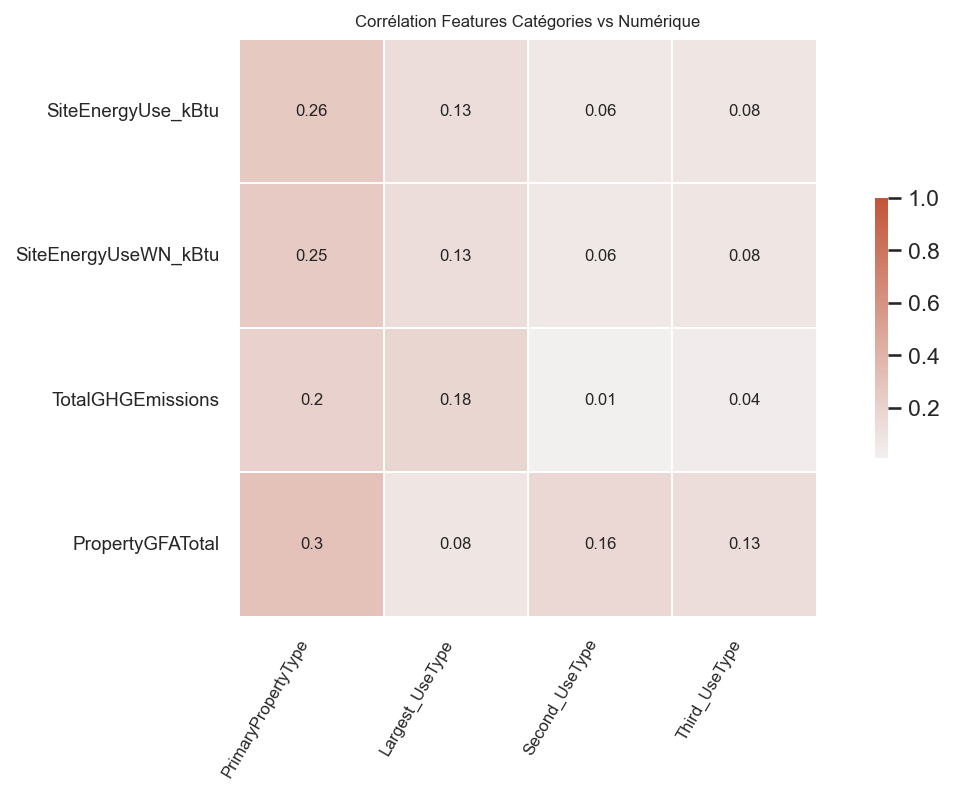

In [55]:
ANOVA(df_test_anova, graph= True, eta_sq=False, p_values=False )

In [56]:
# Généralisation
def target_encoder(data, X, y, m_s=0, mean_encoding=False, liste_encoded=False):
    
    """Target encoding des features catégorielles.
    
    Paramètre:
    data : Le data frame qui contient les features X et la target y. 
    X : Features à encoder
    y : La target
    m_s (int, optional): coefficient de pondération par défault il vaut 0.
    mean_encoding : Si True, utiliser l'encodage par la moyenne, Si False Utiliser l'encodage par la moyenne pondérée. 
    liste_encoded : Si True, retourner la liste des colonnes avec le nouveau nom, ne pas oublier de spécifier le df de sortie
    
    Returns:
    data_frame : df avec en plus des colonnes encodeées.
    """
    
    # Copie data frame d'entrée
    data_frame = data.copy()
    m = int(m_s)

    # Utiliser l'encodage par la moyenne SI mean_encoding = True
    if mean_encoding:
        # Itération sur les colonnes : 
        for col in X:

            # Les catégories uniques
            liste_categorie = list(data_frame[col].unique())

            # Les données encodées
            X_encoded = np.zeros(data_frame[col].shape)

            # Pour chaque catégories en calcul les moyenne et on stock dans X_encoded
            for categorie in liste_categorie:
                mask = (data_frame[col] == categorie)
                X_encoded[mask] = np.mean(y[mask])
                data_frame[f"{data_frame[col].name}_T_Encoded"] = X_encoded

        # Si liste_encoded True, retourner la lsite des colonnes encodées + les data 
        if liste_encoded:
            liste_col_encoded = [f"{col}_T_Encoded" for col in X]
            return data_frame, liste_col_encoded
        
        # Retourner les data encodée si liste_encoded = False
        return data_frame
    
    # Calculer et encoder les variables par la moyenne pondérée si mean_encoding = False
    else:
        # Mean y globale
        mean_y = y.mean()
        liste_col_encoded = []
        # Itération sur toutes les colonnes
        for col in X:

            # Créer un dictionnaire pour stocker le nombre et la moyenne de chaque catégorie
            agg_dict = {}
            liste_categorie = list(data_frame[col].unique())

            # Liste des colonnes encodées
            liste_col_encoded
            # Itération sur toutes les colonnes
            for col in X:

                # Créer un dictionnaire pour stocker le nombre et la moyenne de chaque catégorie
                agg_dict = {}
                liste_categorie = list(data_frame[col].unique())

                # Liste des colonnes encodées
                liste_col_encoded.append(f"{data_frame[col].name}_T_Encoded")

                # Iteration sur les catégories
                for categorie in liste_categorie:
                    # Masque col == catégorie
                    mask = (data_frame[col] == categorie)
                    subset = data_frame[mask]

                    # Mean et Count de la target pour chaque catégorie (un groupe by)
                    count = subset.shape[0]
                    mean = subset[y.name].mean()

                    # Alimentation du dictionnaire de départ
                    agg_dict[categorie] = (count, mean)
                    
        


                # Calcule de la moyenne pondérée pour chaque catégorie
                smooth = {k: (v[0] * v[1] + m * mean_y) / (v[0] + m) for k, v in agg_dict.items()}

                # Encodage de chuque catégorie par la moyenne pondérée correspondante
                #Création d'un variable nouvelle encodée. 
                data_frame[f"{data_frame[col].name}_T_Encoded"] = data_frame[col].map(smooth)
                
        if liste_encoded:
            liste_col_encoded = [f"{col}_T_Encoded" for col in X]
            return data_frame, liste_col_encoded
                
    return data_frame


In [57]:
X = ["PrimaryPropertyType"]
y = df['PropertyGFATotal']

#Si mean_encoding = True
df_transformed, liste_T_encoded = target_encoder(df_transformed, X, y, m_s=5, mean_encoding=False, liste_encoded=True)

In [58]:
liste_T_encoded

['PrimaryPropertyType_T_Encoded']

In [59]:
# Ajout des nouvelles colonnes dans la liste new_col
for elm in liste_T_encoded: 
    new_col.append(elm)

### Label Encoding

Le LabelEncoding est une technique utilisée dans le prétraitement des données pour convertir des données catégorielles, ou des données textuelles, en nombres. Chaque valeur unique dans une colonne catégorique se voit attribuer une valeur entière unique.

Il est important de noter que l'encodage des catégories  ne capture aucun type d'ordre dans les données. Il attribue simplement une valeur entière unique à chaque catégorie unique. 

Ainsi, pour utiliser cette technique, des bibliothèques telles que  la classe 'LabelEncoder' qui peut être utilisée pour l'encodage. Il peut être utilisé comme ceci :


In [60]:
# Création des catégories d'âges des bâtiments
df_transformed['Age_Building_groupe'] = pd.qcut(df_transformed['Age_Building'], 20, duplicates='drop')

In [61]:
# Encodage LabelEncoder()
le = LabelEncoder()
df_transformed['Age_Building_groupe_L'] = le.fit_transform(df_transformed['Age_Building_groupe'])

In [62]:
g_encoded = ['Age_Building_groupe', 'Age_Building_groupe_L']
# Ajout des nouvelles colonnes dans la liste new_col
for elm in g_encoded: 
    new_col.append(elm)
 

In [63]:
new_col

['Age_Building',
 'Ratio_Parking',
 'Ratio_Building',
 'Nombre_Usage_Type',
 'GFA_par_Building',
 'GFA_par_Floor',
 'proportion_Electricity',
 'proportion_Steam',
 'proportion_NaturalGas',
 'Co_stratification',
 'LargestUseType_GFA__proportion',
 'SecondUseType_GFA__proportion',
 'ThirdUseType_GFA__proportion',
 'Neighborhood_H_DOWNTOWN',
 'Neighborhood_H_NORTHEAST',
 'Neighborhood_H_EAST',
 'Neighborhood_H_LAKE UNION',
 'Neighborhood_H_GREATER DUWAMISH',
 'Neighborhood_H_MAGNOLIA / QUEEN ANNE',
 'Neighborhood_H_BALLARD',
 'Neighborhood_H_NORTHWEST',
 'Neighborhood_H_CENTRAL',
 'Neighborhood_H_SOUTHEAST',
 'Neighborhood_H_DELRIDGE',
 'Neighborhood_H_NORTH',
 'Neighborhood_H_SOUTHWEST',
 'BuildingType_H_NonResidential',
 'BuildingType_H_Nonresidential COS',
 'BuildingType_H_SPS-District K-12',
 'BuildingType_H_Campus',
 'PrimaryPropertyType_T_Encoded',
 'Age_Building_groupe',
 'Age_Building_groupe_L']

# Export csv

In [211]:
df_transformed.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kBtu,NaturalGas_kBtu,TotalGHGEmissions,GHGEmissionsIntensity,Age_Building,Ratio_Parking,Ratio_Building,Nombre_Usage_Type,GFA_par_Building,GFA_par_Floor,proportion_Electricity,proportion_Steam,proportion_NaturalGas,Co_stratification,LargestUseType_GFA_proportion,SecondUseType_GFA_proportion,ThirdUseType_GFA_proportion,Neighborhood_H_DOWNTOWN,Neighborhood_H_NORTHEAST,Neighborhood_H_EAST,Neighborhood_H_LAKE UNION,Neighborhood_H_GREATER DUWAMISH,Neighborhood_H_MAGNOLIA / QUEEN ANNE,Neighborhood_H_BALLARD,Neighborhood_H_NORTHWEST,Neighborhood_H_CENTRAL,Neighborhood_H_SOUTHEAST,Neighborhood_H_DELRIDGE,Neighborhood_H_NORTH,Neighborhood_H_SOUTHWEST,BuildingType_H_NonResidential,BuildingType_H_Nonresidential COS,BuildingType_H_SPS-District K-12,BuildingType_H_Campus,PrimaryPropertyType_T_Encoded,Age_Building_groupe,Age_Building_groupe_L
0,2016,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,Aucun,0.0,Aucun,0.0,60.0,81.714748,84.300003,182.500000,189.000000,7226362.00,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83,89.0,0.00,100.00,1.0,88434.0,7369.500,55.0,28.0,18.0,110.0,100.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,136578.069190,"(87.0, 90.0]",15
1,2016,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,80.991184,97.900002,176.100006,179.399994,8387933.00,8664479.0,0.00,3242851.0,5145082.0,295.86,2.86,20.0,14.55,85.45,3.0,103566.0,9415.091,39.0,0.0,61.0,121.0,81.0,14.5,4.5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,136578.069190,"(17.0, 22.0]",3
2,2016,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,Aucun,0.0,Aucun,0.0,56.0,110.805337,113.300003,216.199997,224.000000,6794583.25,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67,90.0,0.00,100.00,1.0,61320.0,6132.000,41.0,33.0,27.0,127.0,100.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,136578.069190,"(87.0, 90.0]",15
3,2016,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Aucun,0.0,75.0,80.718789,118.699997,211.399994,215.600006,14172605.00,14656503.0,0.00,5368607.0,8803998.0,505.01,2.88,36.0,35.31,64.69,3.0,175580.0,9754.444,38.0,0.0,62.0,129.0,70.3,38.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,136578.069190,"(33.0, 37.0]",6
4,2016,Nonresidential COS,Other,7,DOWNTOWN,1999,1.0,2,97288,37198,60090,Police Station,Office,88830.0,Aucun,0.0,Aucun,0.0,NaN,124.235425,141.600006,316.299988,320.500000,12086616.00,12581712.0,0.00,7371434.0,4715182.0,301.81,3.10,17.0,38.23,61.77,1.0,97288.0,48644.000,61.0,0.0,39.0,134.0,91.3,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,90580.398299,"(13.0, 17.0]",2


In [212]:
# df_cleaned : data set clean, sans Feature engineering
path = "./data/transformed/"
filename = "df_transformed.csv"
df_transformed.to_csv(path + filename, index=False)

<span style="font-size:18px;">Nous arrivons de la fin de la phase du features engineering. En utilisant l'ensemble de données df_transformed et diverses features et situations, nous allons construire des modèles de prédiction. Pour plus d'informations, se référer au Notebook **`03_modelisation.`**